#Elisa María Bonilla Martín
#A01028576

###Técnicas de procesamiento de datos para el análisis estadístico y para la construcción de modelos

In [ ]:
#Librerías que utilizare

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Lectura de la base de datos

df=pd.read_csv("Automobile.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
#La forma de la base de datos

print("Base de datos con %s filas y %s columns" % (df.shape[0], df.shape[1]))

Base de datos con 205 filas y 26 columns


In [ ]:
#Para observar los datos específicos en cada columna asi como los tipos de datos que tenemos que tenemos se hace lo siguiente

for col in df.columns:

  print("Nombre de la columna: ", col)
  print("-"*50)
  print("Tipo de datos: ", df[col].dtypes)
  print("-"*50)
  print("Valores únicos de la columna: \n", np.unique(df[col]))
  print("-"*50)

Nombre de la columna:  symboling
--------------------------------------------------
Tipo de datos:  int64
--------------------------------------------------
Valores únicos de la columna: 
 [-2 -1  0  1  2  3]
--------------------------------------------------
Nombre de la columna:  normalized-losses
--------------------------------------------------
Tipo de datos:  object
--------------------------------------------------
Valores únicos de la columna: 
 ['101' '102' '103' '104' '106' '107' '108' '110' '113' '115' '118' '119'
 '121' '122' '125' '128' '129' '134' '137' '142' '145' '148' '150' '153'
 '154' '158' '161' '164' '168' '186' '188' '192' '194' '197' '231' '256'
 '65' '74' '77' '78' '81' '83' '85' '87' '89' '90' '91' '93' '94' '95'
 '98' '?']
--------------------------------------------------
Nombre de la columna:  make
--------------------------------------------------
Tipo de datos:  object
--------------------------------------------------
Valores únicos de la columna: 
 ['alf

## Tratamiento de los valores nulos

In [ ]:
#Al observar lo anterior podemos ver que En la base de datos tenemos signos de interrogación para mostrar datos que no tenemos, los remplazamos con NaN para poder trabajar mejor

#Creamos una lista para añadir las columnas que tienen signos de interrogación (valores Nan)
valcons=[]

for col in df.columns:
  if '?' in df[col].to_list():

    print("Nombre de la columna: ", col)
    df[col].replace('?', np.nan, inplace=True)
    valcons.append(col)
    
print(valcons)


Nombre de la columna:  normalized-losses
Nombre de la columna:  number-of-doors
Nombre de la columna:  bore
Nombre de la columna:  stroke
Nombre de la columna:  horsepower
Nombre de la columna:  peak-rpm
Nombre de la columna:  price
['normalized-losses', 'number-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']


In [ ]:
#Aquí observamos el head de la base para ver que si lo cambiamos

df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
#Ahora convertiremos algunas columnas que son objetos en valores númericos
#Columna Normalized-losses

df['normalized-losses']=pd.to_numeric(df['normalized-losses'], errors='coerce').astype('Int64')

print("El tipo de valores de la columna Normalized-losses es: ", df['normalized-losses'].dtypes)

#Columna Bore

df['bore']=pd.to_numeric(df['bore'], errors='coerce').astype('float64')

print("El tipo de valores de la columna Bore es: ", df['bore'].dtypes)

#Columna Stroke

df['stroke']=pd.to_numeric(df['stroke'], errors='coerce').astype('float64')

print("El tipo de valores de la columna Stroke es: ", df['stroke'].dtypes)
#Columna Horsepower

df['horsepower']=pd.to_numeric(df['horsepower'], errors='coerce').astype('Int64')

print("El tipo de valores de la columna Horsepower es: ", df['horsepower'].dtypes)
#Columna Peak-rpm

df['peak-rpm']=pd.to_numeric(df['peak-rpm'], errors='coerce').astype('Int64')

print("El tipo de valores de la columna Peak.rpm es: ", df['peak-rpm'].dtypes)
#Columna Price

df['price']=pd.to_numeric(df['price'], errors='coerce').astype('Int64')

print("El tipo de valores de la columna Price es: ", df['price'].dtypes)


El tipo de valores de la columna Normalized-losses es:  float64
El tipo de valores de la columna Bore es:  float64
El tipo de valores de la columna Stroke es:  float64
El tipo de valores de la columna Horsepower es:  Int64
El tipo de valores de la columna Peak.rpm es:  Int64
El tipo de valores de la columna Price es:  Int64


In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,161.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
df['number-of-doors'].mode()

0    4
dtype: int64

In [ ]:
#Para la columna Number-of-doors replazaremos los valores Nan por 4 deebido a que es el número de puertas que más se repite

df['number-of-doors'].replace(np.nan, 'four', inplace=True)

#Ahora haremos convertiremos la columna a numérica

df['number-of-doors'].replace( 'four',4, inplace=True)

df['number-of-doors'].replace( 'two',2, inplace=True)

print("Los valores de la columna son: ", np.unique(df['number-of-doors']))

print("El tipo de datos de la columna es: ", df['number-of-doors'].dtypes)


Los valores de la columna son:  [2 4]
El tipo de datos de la columna es:  int64


In [ ]:

#Removeremos la columna number-of-doors de nuestra lista porque ya no tiene valores Nan

valcons.remove('number-of-doors')

print(valcons)

ValueError: ignored

In [ ]:
#Verificamos las columnas y sus tipos para poder tomar una decisión acerca de los datos nan

for col in valcons:
    print("Nombre de la columna: ", col,"\n Tipo de dato ", df[col].dtypes)




Nombre de la columna:  normalized-losses 
 Tipo de dato  float64
Nombre de la columna:  bore 
 Tipo de dato  float64
Nombre de la columna:  stroke 
 Tipo de dato  float64
Nombre de la columna:  horsepower 
 Tipo de dato  Int64
Nombre de la columna:  peak-rpm 
 Tipo de dato  Int64
Nombre de la columna:  price 
 Tipo de dato  Int64


In [ ]:
#Para las columnas bore y stroke que sus datos son con decimales, remplazaremos los valores Nan por la media de cada columna

mean_val = valcons[1:3]
print(mean_val)

#Para el resto de las columnas sustituiremos con la moda de cada columna

mode_val = valcons[0:1] + valcons[3:]
print(mode_val)




['bore', 'stroke']
['normalized-losses', 'horsepower', 'peak-rpm', 'price']


In [ ]:
for col in mean_val:   
    median_value = df[col].mean() 
    df[col].fillna(value = median_value, inplace=True) 
 




In [ ]:
for col in mode_val: 
    
    mode_value = df[col].mode()[0] 
    df[col].fillna( mode_value, inplace=True) 
    


In [ ]:
#Ahora checaremos si existen valores Nan en nuestra base de Datos

check_for_nan = df.isnull().values.any()
print (check_for_nan)

False


## Detección de Outliers


In [ ]:
#Checaremos los valores únicos de cada columna

for col in df.columns:
  print("Nombre de la columna:", col, "\n" ,"Tipo de dato: ", df[col].dtypes)
  print("-"*50)

  print("Valores únicos de la columna: ", np.unique(df[col]))
  print("-"*50)

Nombre de la columna: symboling 
 Tipo de dato:  int64
--------------------------------------------------
Valores únicos de la columna:  [-2 -1  0  1  2  3]
--------------------------------------------------
Nombre de la columna: normalized-losses 
 Tipo de dato:  float64
--------------------------------------------------
Valores únicos de la columna:  [ 65.  74.  77.  78.  81.  83.  85.  87.  89.  90.  91.  93.  94.  95.
  98. 101. 102. 103. 104. 106. 107. 108. 110. 113. 115. 118. 119. 121.
 122. 125. 128. 129. 134. 137. 142. 145. 148. 150. 153. 154. 158. 161.
 164. 168. 186. 188. 192. 194. 197. 231. 256.]
--------------------------------------------------
Nombre de la columna: make 
 Tipo de dato:  object
--------------------------------------------------
Valores únicos de la columna:  ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volk

In [ ]:
#Seleccionamos las columnas en las cuales podriamos encontrar outliers

outcols = ['normalized-losses','wheel-base','width','height','curb-weight','engine-size','bore','stroke','compression-ratio', 'horsepower','peak-rpm','price']


Valores fuera del intervalo $[P_{25}-1.5\cdot\mathrm{IQR}, P_{75}+1.5\cdot\mathrm{IQR}]$, where $\mathrm{IQR} = P_{75} - P_{25}$ se consideran outliers

In [ ]:
factor = 1.5
bounds = {}

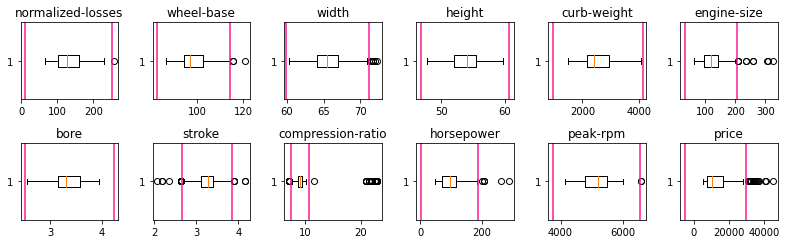

In [ ]:
fig = plt.figure(figsize=(11,3.5))

for i,col in enumerate(outcols):
    p25 = np.percentile(df[col], 25)
    p75 = np.percentile(df[col], 75)
    ri  = p75 - p25 
    
    lb = p25-(factor*ri)
    up = p75+(factor*ri)
    
    bounds.update({col:[lb,up]})
    
    fig.add_subplot(2,6,i+1)
    plt.boxplot(df[col],vert=False)
    plt.axvline(lb,color='deeppink')
    plt.axvline(up,color='deeppink')
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
df1 = df.copy()
for col in outcols:
    df1.loc[df1[col]>=bounds[col][1], col] = bounds[col][1]

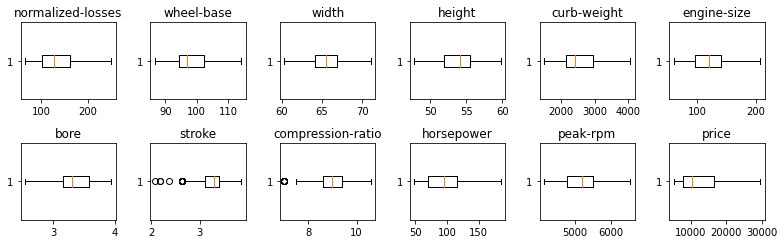

In [ ]:
fig = plt.figure(figsize=(11,3.5))

for i,col in enumerate(outcols):
    fig.add_subplot(2,6,i+1)
    plt.boxplot(df1[col],vert=False)
    plt.title(col)

plt.tight_layout()
plt.show()